In [26]:
import tensorflow.image as timg
import tensorflow as tf
from matplotlib import pyplot as plt
import os
tf.enable_eager_execution()

In [18]:
raw_path = "./data/cell"
# test_path  = "./data/cell/test"
rawimage_path = os.listdir(f"{raw_path}/rawimage")
rawlabel_path = os.listdir(f"{raw_path}/rawlabel")
rawimage_path = [f"{raw_path}/rawimage/{i}" for i in rawimage_path]
rawlabel_path = [f"{raw_path}/rawlabel/{i}" for i in label_path]

In [28]:
train_path = f"{raw_path}/train"
test_path = f"{raw_path}/test"

In [33]:
def random_cut(imagepath,labelpath,image_output_dir,label_output_dir):
    ipath,iname = os.path.split(imagepath)
    lpath,lname = os.path.split(labelpath)
    
    rname,ext = os.path.splitext(iname)
    
    print(imagepath)
    
    imagef,labelf = tf.read_file(imagepath),tf.read_file(labelpath)
    image,label = timg.decode_image(imagef),timg.decode_image(labelf)
    if image.ndim == 3 and image.shape[-1] == 4:
        image = image[:,:,:3]
    
    if image.shape[:2] != label.shape[:2]:
        print(f"shape not eq in {imagepath}")
        return
    
    pix = 256
    concat = tf.concat([image,label],axis=-1)
    num = 4
    for i in range(num):
        nvalue = timg.random_crop(concat,(pix,pix,concat.shape[-1]),seed = 666)
        clipimage,cliplabel = nvalue[:,:,:image.shape[-1]].numpy(),nvalue[:,:,image.shape[-1]:].numpy()
        cliplabel = cliplabel[:,:,1]
        cliplabel[cliplabel<125] = 0
        cliplabel[cliplabel>125] = 255
        plt.imsave(image_output_dir+f"/{i}_{rname}.jpg",clipimage)
        
        import scipy.misc
        scipy.misc.toimage(cliplabel).save(label_output_dir+f"/{i}_{rname}.jpg")
        
#         plt.imsave(label_output_dir+f"/{i}_{lname}",cliplabel,cmap='gray')

In [22]:
def random_cut(imagepath,image_output_dir,i):
    ipath,iname = os.path.split(imagepath)
    
    rname,ext = os.path.splitext(iname)
    
    print(imagepath)
    
    imagef = tf.read_file(imagepath)
    image = timg.decode_image(imagef)
    if image.ndim == 3 and image.shape[-1] == 4:
        image = image[:,:,:3]
    
    pix = 256
    num = 10
    nvalue = timg.random_crop(image,(pix,pix,image.shape[-1]),seed = 666)
#     clipimage = nvalue[:,:,:image.shape[-1]].numpy()
    plt.imsave(image_output_dir+f"/{i}.jpg",nvalue.numpy())

In [ ]:
def resize(ifname,size = (1000))

infile = 'D:\\original_img.jpg'
outfile = 'D:\\adjust_img.jpg'
im = Image.open(infile)
(x,y) = im.size #read image size
x_s = 250 #define standard width
y_s = y * x_s / x #calc height based on standard width
out = im.resize((x_s,y_s),Image.ANTIALIAS) #resize image with high-quality
out.save(outfile)

In [37]:
for i,l in zip(rawimage_path,rawlabel_path):
    random_cut(i,l,f"{train_path}/image",f"{train_path}/label")

./data/cell/rawimage/0.jpg


c:\users\sailist\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:30: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.


./data/cell/rawimage/1.jpg
./data/cell/rawimage/10.jpg
./data/cell/rawimage/11.jpg
./data/cell/rawimage/12.jpg
./data/cell/rawimage/13.jpg
./data/cell/rawimage/14.jpg
./data/cell/rawimage/15.jpg
./data/cell/rawimage/16.jpg
./data/cell/rawimage/17.jpg
./data/cell/rawimage/18.jpg
./data/cell/rawimage/19.jpg
./data/cell/rawimage/2.jpg
./data/cell/rawimage/20.jpg
./data/cell/rawimage/21.jpg
./data/cell/rawimage/22.jpg
./data/cell/rawimage/23.jpg
./data/cell/rawimage/24.jpg
./data/cell/rawimage/25.jpg
./data/cell/rawimage/26.jpg
./data/cell/rawimage/27.jpg
./data/cell/rawimage/28.jpg
./data/cell/rawimage/29.jpg
./data/cell/rawimage/3.jpg
./data/cell/rawimage/4.jpg
./data/cell/rawimage/5.jpg
./data/cell/rawimage/6.jpg
./data/cell/rawimage/7.jpg
./data/cell/rawimage/8.jpg
./data/cell/rawimage/9.jpg


In [125]:
image_path[i],label_path[i]

('./data/membrane/train/image/tile_x003_y006.PNG',
 './data/membrane/train/label/tile_x003_y006.PNG')

In [85]:
cliplabel = cliplabel.numpy()

In [94]:
cliplabel[cliplabel<125] = 0

In [106]:
plt.imread("./cut_new/label/0_008-014.PNG")

(512, 512, 4)

In [98]:
cliplabel[:,:,1]

array([[255, 255, 255, ...,   0,   0,   0],
       [  0,   0, 255, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [55]:
import matplotlib.pyplot as plt

In [142]:
clipimage.ndim

3

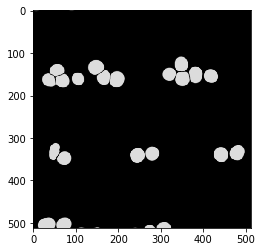

In [69]:
plt.imshow(cliplabel)

In [53]:
cliplabel

<tf.Tensor: id=269, shape=(512, 512, 4), dtype=uint8, numpy=
array([[[255, 160, 160, 160],
        [255, 207, 207, 207],
        [255, 220, 220, 220],
        ...,
        [255,   0,   0,   0],
        [255,   0,   0,   0],
        [255,   0,   0,   0]],

       [[255,  48,  48,  48],
        [255,  93,  93,  93],
        [255, 140, 140, 140],
        ...,
        [255,   0,   0,   0],
        [255,   0,   0,   0],
        [255,   0,   0,   0]],

       [[255,   4,   4,   4],
        [255,  16,  16,  16],
        [255,  34,  34,  34],
        ...,
        [255,   0,   0,   0],
        [255,   0,   0,   0],
        [255,   0,   0,   0]],

       ...,

       [[255,   0,   0,   0],
        [255,   0,   0,   0],
        [255,   0,   0,   0],
        ...,
        [255,   0,   0,   0],
        [255,   0,   0,   0],
        [255,   0,   0,   0]],

       [[255,   0,   0,   0],
        [255,   0,   0,   0],
        [255,   0,   0,   0],
        ...,
        [255,   0,   0,   0],
        [255,